# Wheat Production and Global Pricing Dynamics

Authors: Matthew Ocampo, Sam Sims, Judith Haryanto, Sant Sumetpong

## Introduction

Changes in food prices depend on changes in input costs. It’s not the only factor of course (i.e., climate, economic stability, changes in demand, changes in demand/supply of substitutes or complements, etc). As such, should there be changes in input costs, we would expect to see changes in food prices. The research question we’re interested in the temporal relationship between changes in input costs with changes in food prices with time progression. We will be investigating the relationship between oil prices and wheat prices while controlling for other factors such as climate and the cost of other inputs like fertilizer and pesticides. The findings could contribute towards greater understanding of how food prices fluctuate based of off oil prices, specifically how much do changes in oil prices affect food prices. This will be useful in informing macroeconomic policies and international relations since not only are oil and wheat commodities in most – if not all – countries, but the price increase in these goods also tend to be act as inflationary pressure to the local economy.

For this project, our group proposes to examine the prices of oil as an input in agricultural activity and how the fluctuating price of oil affects the end cost of wheat. We will base our analysis on a time lag of oil looking for correlation with the price of wheat later.

This project will require combining and cleaning datasets, visualizing trends in data as well as mapping of sources of wheat, and input time lag with regression.

Afterwards, we will combine our work with the other group’s work, which will look at the associated costs of transportation, look at how oil prices affect it, and look at the combined correlation of these factors on the price of wheat.


## Hypothesis

We hypothesize that oil prices may be more closely correlated with wheat prices once it's been lagged. This is due to numerous potential reasons: <br>
i) Delayed information on price changes and subsequent changes in economic activities across the supply chain and across levels of production <br>
ii) Farmers purchase oil at a set price through contracts on numerous occasions during the year, thus are incentivized to form purchase contracts when prices are low. <br>
iii) The global wheat market, even though it is not concentrated, peak production happens when the Northern hemisphere experiences summer and fall. Therefore changes in oil prices may not impact wheat prices when production is low. <br>

## Methodology

We decided to use US data for our analyses because not only are there a lot of datasets being publicly available, but also because US is one of the largest global producers and exporters of wheat. Our analyses is restricted to monthly data from January 1990 to February 2024, just after massive technological changes and large scale farming become increasingly adopted starting from 1970s. Monthly wheat prices, oil prices (West Texas Intermediary pricing), seed prices, machinery prices, are obtained from the Federal Reserve Economic Data (FRED). Climate data (i.e., monthly precipitation) were obtained from the National Oceanic and Atmospheric Administration (NOAA). Information on US minimum wage and wages of farm labourers were obtained from the US Department of Agriculture (USDA) and the US Bureau of Labour Statistics.

We then plotted numerous variables alongside one another to visualized how the movements of one variable changes relative to another - supplementing these graphs with correlation coefficients to see how two variables are closely correlated to one another.

Finally, we will regress oil prices as our treatment variable, other inputs as controlled variables, versus wheat prices as the outcome variable to form a time-series regression model. Oil prices will be lagged behind wheat prices using various time lags to check whether there's greater fit. 


## Data cleaning and merging

PCU325311325311-4.csv is Producer Price Index by Industry: Nitrogenous Fertilizer Manufacturing: Urea (DISCONTINUED) <br>
WTISPLC is the price of oil by West Texas Intermediary <br>
WPUSI024011 is the Producer Price Index by Commodity: Special Indexes: Agricultural Machinery, Including Tractors <br>
PWHEAMTUSDM is the Global price of Wheat <br>
farm_wage_data_99t22 is the farm wage data from USDA. <br>
Pesticide2003 is pesticade data from 2003. <br>
PCU3253203253201 is pesticide data from Producer Price Index by Industry: Pesticide and Other Agricultural Chemical Manufacturing: Agricultural and Commercial Pesticides and Chemicals FRED <br>
seeds is seed prices -  (oh wow much surprise) <br>
weather data from NOAA <br>
wheat production <br>

In [3]:
### packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### data cleanup part 1, starting with precipitation data and production data (annual)
pcpt_raw = pd.read_csv("weather data.csv")
wprod_raw = pd.read_csv("wheat production.csv")

#remove unecesary columns
wprod = wprod_raw.drop(wprod_raw.columns[list(range(6, 13))], axis = 1)

#remove rows 243 to 249 for production data because these rows are 2024 data
wprod = wprod.drop(list(range(243, 250)))
#remove 2024 data for weather data, rows 408 - 410
pcpt_raw = pcpt_raw.drop(list(range(408, 410)))

#assign column names to wheat production dataframe
wprod.columns = ['Year', 'Quarter', 'Beginning stocks', 'Production', 'Imports', 'Total supply']

#drop empty rows to get yearly production data
test = wprod.dropna(subset = ['Year','Production'])
test = test.reset_index(drop = True)
y1 = list(map(str, list(range(1975, 2024))))
y2 = list(map(str, list(range(1976, 2025))))
test.loc[:, 'Year'] = [u+'/'+i for u, i in zip(y1, y2)] #to rename the data

#remove years before 1990 (so first entry is now 1990/1991)
test_red = test.drop(list(range(0, 15))).reset_index(drop=True)

#group precipitation data to get yearly averages for every 12 row entries (representing 12 months)
pcpt_year = pcpt_raw.groupby(np.arange(len(pcpt_raw))//12).mean()

# now merge yearly precipitation with yearly production
year = list(range(1990, 2024)) # length is 34

pcpt_prod = pd.DataFrame([year, test_red['Production'], pcpt_year['Value']]).T
pcpt_prod.columns = ['Year', 'Production', 'Precipitation']
pcpt_prod = pcpt_prod.set_index('Year')
pcpt_prod["Production"] = pcpt_prod["Production"].str.replace(",","").astype(float)
pcpt_prod["Precipitation"] = pcpt_prod["Precipitation"].astype(float)

pcpt_prod.head(10) #final cleaned, modified precipitation and wheat production data

In [7]:
### data cleanup, merging monthly data into one
df1 = pd.read_csv('PCU325311325311-4.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df1 = pd.merge(df1, df2)
merged_df1

df3 = pd.read_csv('WPUSI024011.csv')
merged_df2 = pd.merge(merged_df1,df3)
merged_df2

df4 = pd.read_csv('PWHEAMTUSDM.csv')
merged_df3 = pd.merge(merged_df2,df4)
merged_df3.head()

,DATE,PCU325311325311,WTISPLC,WPUSI024011,PWHEAMTUSDM
0,1990-01-01,114.4,22.641,122.3,167.918579
1,1990-02-01,120.1,22.108,122.4,160.937271
2,1990-03-01,119.6,20.418,122.8,156.528030
3,1990-04-01,119.1,18.582,123.2,159.467529
4,1990-05-01,115.8,18.237,123.2,149.179291


In [2]:
### data merging

## Analysis

In [1]:
import pandas as pd

df1 = pd.read_csv('PCU325311325311-4.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df1 = pd.merge(df1, df2)
merged_df1

df3 = pd.read_csv('WPUSI024011.csv')
merged_df2 = pd.merge(merged_df1,df3)
merged_df2

df4 = pd.read_csv('PWHEAMTUSDM.csv')
merged_df3 = pd.merge(merged_df2,df4)
merged_df3.head()

,DATE,PCU325311325311,WTISPLC,WPUSI024011,PWHEAMTUSDM
0,1990-01-01,114.4,22.641,122.3,167.918579
1,1990-02-01,120.1,22.108,122.4,160.937271
2,1990-03-01,119.6,20.418,122.8,156.528030
3,1990-04-01,119.1,18.582,123.2,159.467529
4,1990-05-01,115.8,18.237,123.2,149.179291


In [2]:
import pandas as pd


df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df = pd.merge(df1, df2)
merged_df.head()

,DATE,WPUSI024011,WTISPLC
0,1990-01-01,122.3,22.641
1,1990-02-01,122.4,22.108
2,1990-03-01,122.8,20.418
3,1990-04-01,123.2,18.582
4,1990-05-01,123.2,18.237


In [3]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')

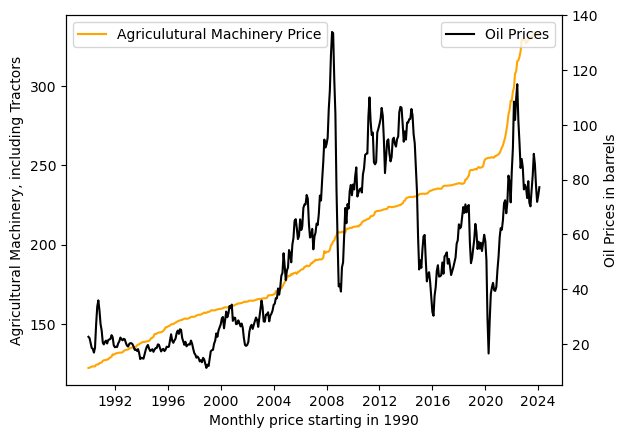

In [4]:
import matplotlib.pyplot as plt

x = merged_df.index
y1 = merged_df['WPUSI024011']
y2 = merged_df['WTISPLC']

fig, ax1 = plt.subplots()

# Duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# Plot data on the first y-axis
ax1.plot(x, y1, color ='orange', label='Agriculutural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# Plot data on the second y-axis
ax2.plot(x, y2, color = 'black', label='Oil Prices') #The data was collected by the International Montetary Fund
ax2.set_ylabel('Oil Prices in barrels', color='black')

# Display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [5]:
merged_df["WTISPLC"].corr(merged_df["WPUSI024011"])

0.6840589469388291

In [6]:
df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df = pd.merge(df1, df2)
merged_df.head()

,DATE,WPUSI024011,PWHEAMTUSDM
0,1990-01-01,122.3,167.918579
1,1990-02-01,122.4,160.937271
2,1990-03-01,122.8,156.528030
3,1990-04-01,123.2,159.467529
4,1990-05-01,123.2,149.179291


In [7]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')

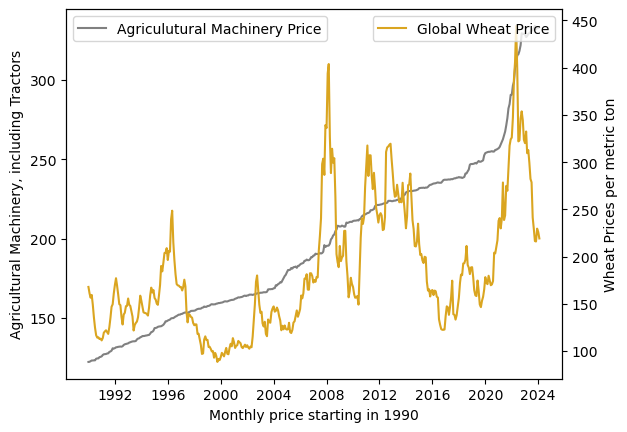

In [9]:
x = merged_df.index
y1 = merged_df['WPUSI024011']
y2 = merged_df['PWHEAMTUSDM']

fig, ax1 = plt.subplots()

# Duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# Plot data on the first y-axis
ax1.plot(x, y1, color ='Grey', label='Agriculutural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# Plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price') #The data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# Display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [10]:
merged_df["WPUSI024011"].corr(merged_df["PWHEAMTUSDM"])

0.6294197632618082

In [11]:
import pandas as pd


df1 = pd.read_csv('PCU325311325311-4.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df = pd.merge(df1, df2)
merged_df.head()

,DATE,PCU325311325311,WTISPLC
0,1990-01-01,114.4,22.641
1,1990-02-01,120.1,22.108
2,1990-03-01,119.6,20.418
3,1990-04-01,119.1,18.582
4,1990-05-01,115.8,18.237


In [12]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')

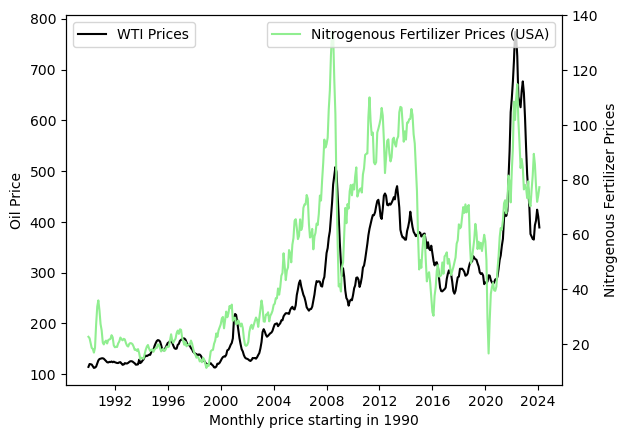

In [13]:
import matplotlib.pyplot as plt

x = merged_df.index
y1 = merged_df['PCU325311325311']
y2 = merged_df['WTISPLC']

fig, ax1 = plt.subplots()

# Duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# Plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='WTI Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price', color='black')

# Plot data on the second y-axis
ax2.plot(x, y2, color = 'lightgreen', label='Nitrogenous Fertilizer Prices (USA)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# Display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [14]:
merged_df["PCU325311325311"].corr(merged_df["WTISPLC"])

0.8361374552246094

In [15]:
merged_df["WTISPLC"].corr(merged_df["PCU325311325311"])

0.8361374552246094

In [16]:
df3 = pd.read_csv('PWHEAMTUSDM.csv')
df3.head()

,DATE,PWHEAMTUSDM
0,1990-01-01,167.918579
1,1990-02-01,160.937271
2,1990-03-01,156.528030
3,1990-04-01,159.467529
4,1990-05-01,149.179291


In [17]:
merged_df2 = pd.merge(df1, df3)
merged_df.head()

,PCU325311325311,WTISPLC
DATE,,
1990-01-01,114.4,22.641
1990-02-01,120.1,22.108
1990-03-01,119.6,20.418
1990-04-01,119.1,18.582
1990-05-01,115.8,18.237


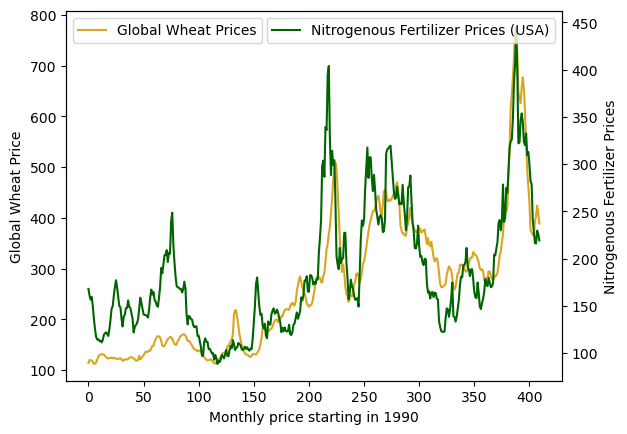

In [19]:
x = merged_df2.index
y1 = merged_df2['PCU325311325311']
y2 = merged_df2['PWHEAMTUSDM']

fig, ax1 = plt.subplots()

# Duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# Plot data on the first y-axis
ax1.plot(x, y1, color ='#DAA520', label='Global Wheat Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Global Wheat Price', color='black')

# Plot data on the second y-axis
ax2.plot(x, y2, color = 'darkgreen', label='Nitrogenous Fertilizer Prices (USA)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# Display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [21]:
merged_df2["PCU325311325311"].corr(merged_df2["PWHEAMTUSDM"])

0.8338631173271533

In [22]:
merged_df2["PWHEAMTUSDM"].corr(merged_df2["PCU325311325311"])

0.8338631173271533

In [23]:
df1 = pd.read_csv('WTISPLC.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df = pd.merge(df1, df2)
merged_df.head()

,DATE,WTISPLC,PWHEAMTUSDM
0,1990-01-01,22.641,167.918579
1,1990-02-01,22.108,160.937271
2,1990-03-01,20.418,156.528030
3,1990-04-01,18.582,159.467529
4,1990-05-01,18.237,149.179291


In [24]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')

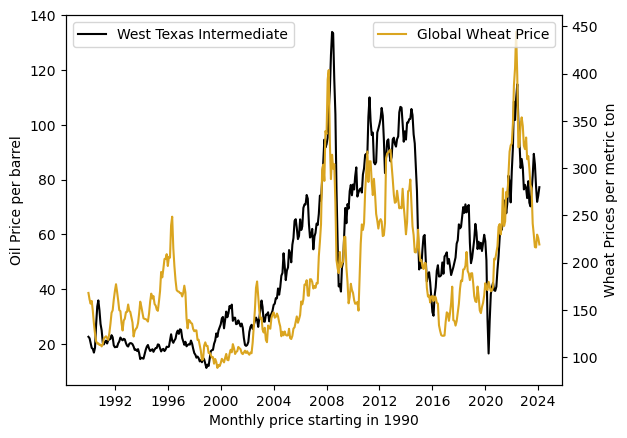

In [26]:
import matplotlib.pyplot as plt

x = merged_df.index
y1 = merged_df['WTISPLC']
y2 = merged_df['PWHEAMTUSDM']

fig, ax1 = plt.subplots()

# Duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# Plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='West Texas Intermediate')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price per barrel', color='black')

# Plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price') #The data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# Display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [28]:
merged_df["WTISPLC"].corr(merged_df["PWHEAMTUSDM"])

0.7816870663891704

In [27]:
merged_df["PWHEAMTUSDM"].corr(merged_df["WTISPLC"])

0.7816870663891704

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('farm_wage_data_99t22.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

df2['DATE'] = pd.to_datetime(df2['DATE'])
df2 = df2[df2['DATE'].dt.month == 5]
df2 = df2[(df2['DATE'].dt.year >= 1999) & (df2['DATE'].dt.year <= 2022)]
df2['Year'] = df2['DATE'].dt.year.astype(int)
df2.drop(columns=['DATE'], inplace=True)


merged_df = pd.merge(df1, df2, on='Year')
merged_df.head()

,Year,Employment,Mean,PWHEAMTUSDM
0,1999,463360,18000,99.610331
1,2000,460700,18860,99.112047
2,2001,453050,19630,110.774167
3,2002,451140,20220,104.096405
4,2003,448005,20445,131.052411


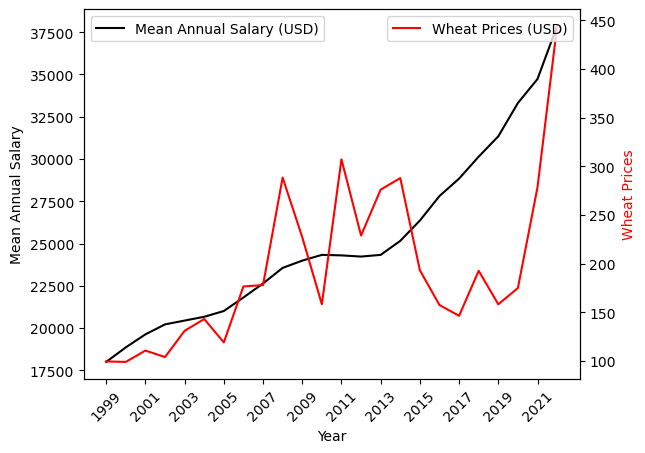

In [30]:
fig, ax1 = plt.subplots()
# use the 'Year' column as the x-axis values
x = merged_df['Year'] 
y1 = merged_df['Mean']
y2 = merged_df['PWHEAMTUSDM']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'black', label='Mean Annual Salary (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Annual Salary', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'red', label='Wheat Prices (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Wheat Prices', color='red')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# adjust x-axis to display every year clearly
ax1.set_xticks(x[::2])
ax1.set_xticklabels(x[::2], rotation=45)  

plt.show()

In [31]:
merged_df["Mean"].corr(merged_df["PWHEAMTUSDM"])

0.6014352631721659

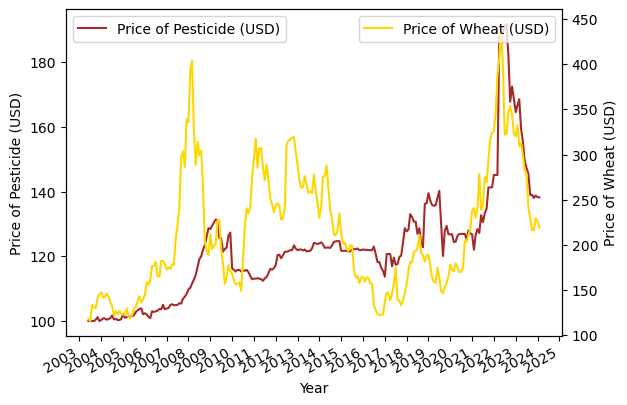

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df1 = pd.read_csv('Pesticide2003.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df = pd.merge(df1, df2)
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')
merged_df.head()

fig, ax1 = plt.subplots()
# use the 'Year' column as the x-axis values
x = merged_df.index 
y1 = merged_df['PCU3253203253201']
y2 = merged_df['PWHEAMTUSDM']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Price of Pesticide (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price of Pesticide (USD)', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'gold', label='Price of Wheat (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Price of Wheat (USD)', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()

In [ ]:
merged_df.tail()

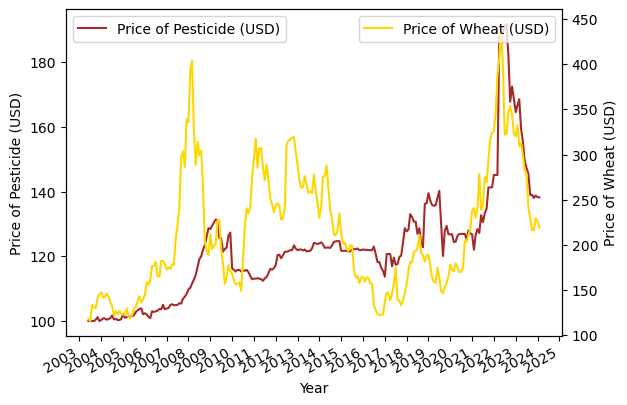

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df1 = pd.read_csv('Pesticide2003.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df = pd.merge(df1, df2)
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')
merged_df.head()

fig, ax1 = plt.subplots()
# use the 'Year' column as the x-axis values
x = merged_df.index 
y1 = merged_df['PCU3253203253201']
y2 = merged_df['PWHEAMTUSDM']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Price of Pesticide (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price of Pesticide (USD)', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'gold', label='Price of Wheat (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Price of Wheat (USD)', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()

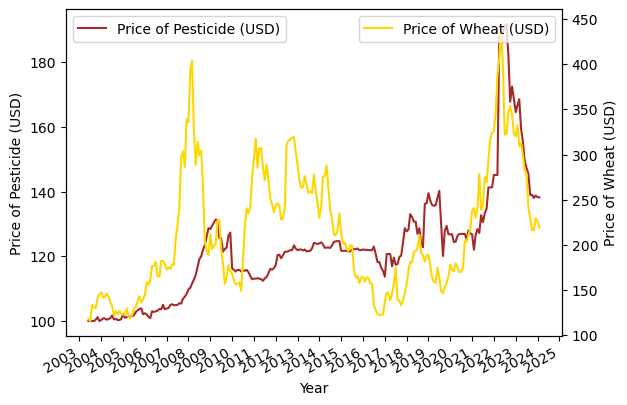

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df1 = pd.read_csv('Pesticide2003.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df = pd.merge(df1, df2)
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')
merged_df.head()

fig, ax1 = plt.subplots()
# use the 'Year' column as the x-axis values
x = merged_df.index 
y1 = merged_df['PCU3253203253201']
y2 = merged_df['PWHEAMTUSDM']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Price of Pesticide (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price of Pesticide (USD)', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'gold', label='Price of Wheat (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Price of Wheat (USD)', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()

In [35]:
merged_df["PCU3253203253201"].corr(merged_df["PWHEAMTUSDM"])

0.5474396510682034

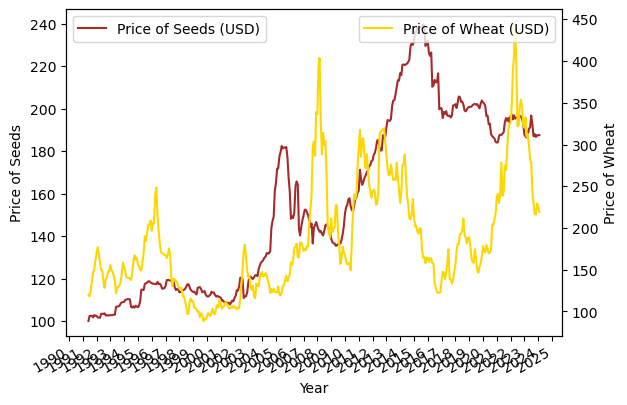

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df1 = pd.read_csv('seeds.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df = pd.merge(df1, df2)
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
merged_df = merged_df.set_index('DATE')
merged_df.head()

fig, ax1 = plt.subplots()
# use the 'Year' column as the x-axis values
x = merged_df.index 
y1 = merged_df['WPU02550304']
y2 = merged_df['PWHEAMTUSDM']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Price of Seeds (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price of Seeds', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'gold', label='Price of Wheat (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Price of Wheat', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Make sure x-axis labels do not overlap
fig.autofmt_xdate()

plt.show()

In [37]:
merged_df["WPU02550304"].corr(merged_df["PWHEAMTUSDM"])

0.4642701482625892

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pcpt_raw = pd.read_csv("weather data.csv")
wprod_raw = pd.read_csv("wheat production.csv")

#remove unecesary columns
wprod = wprod_raw.drop(wprod_raw.columns[list(range(6, 13))], axis = 1)

#remove rows 243 to 249 for production data because these rows are 2024 data
wprod = wprod.drop(list(range(243, 250)))
#remove 2024 data for weather data, rows 408 - 410
pcpt_raw = pcpt_raw.drop(list(range(408, 410)))

#assign column names to wheat production dataframe
wprod.columns = ['Year', 'Quarter', 'Beginning stocks', 'Production', 'Imports', 'Total supply']

#drop empty rows to get yearly production data
test = wprod.dropna(subset = ['Year','Production'])
test = test.reset_index(drop = True)
y1 = list(map(str, list(range(1975, 2024))))
y2 = list(map(str, list(range(1976, 2025))))
test.loc[:, 'Year'] = [u+'/'+i for u, i in zip(y1, y2)] #to rename the data

#remove years before 1990 (so first entry is now 1990/1991)
test_red = test.drop(list(range(0, 15))).reset_index(drop=True)

#group precipitation data to get yearly averages for every 12 row entries (representing 12 months)
pcpt_year = pcpt_raw.groupby(np.arange(len(pcpt_raw))//12).mean()

# now merge yearly precipitation with yearly production
year = list(range(1990, 2024)) # length is 34

pcpt_prod = pd.DataFrame([year, test_red['Production'], pcpt_year['Value']]).T
pcpt_prod.columns = ['Year', 'Production', 'Precipitation']
pcpt_prod = pcpt_prod.set_index('Year')
pcpt_prod["Production"] = pcpt_prod["Production"].str.replace(",","").astype(float)
pcpt_prod["Precipitation"] = pcpt_prod["Precipitation"].astype(float)

pcpt_prod.head(10) #final cleaned, modified precipitation and wheat production data

,Production,Precipitation
Year,,
1990,2730.0,2.680833
1991,1980.0,2.703333
1992,2467.0,2.605000
1993,2396.0,2.718333
1994,2321.0,2.551667
1995,2183.0,2.724167
1996,2277.0,2.808333
1997,2481.0,2.655000
1998,2547.0,2.824167


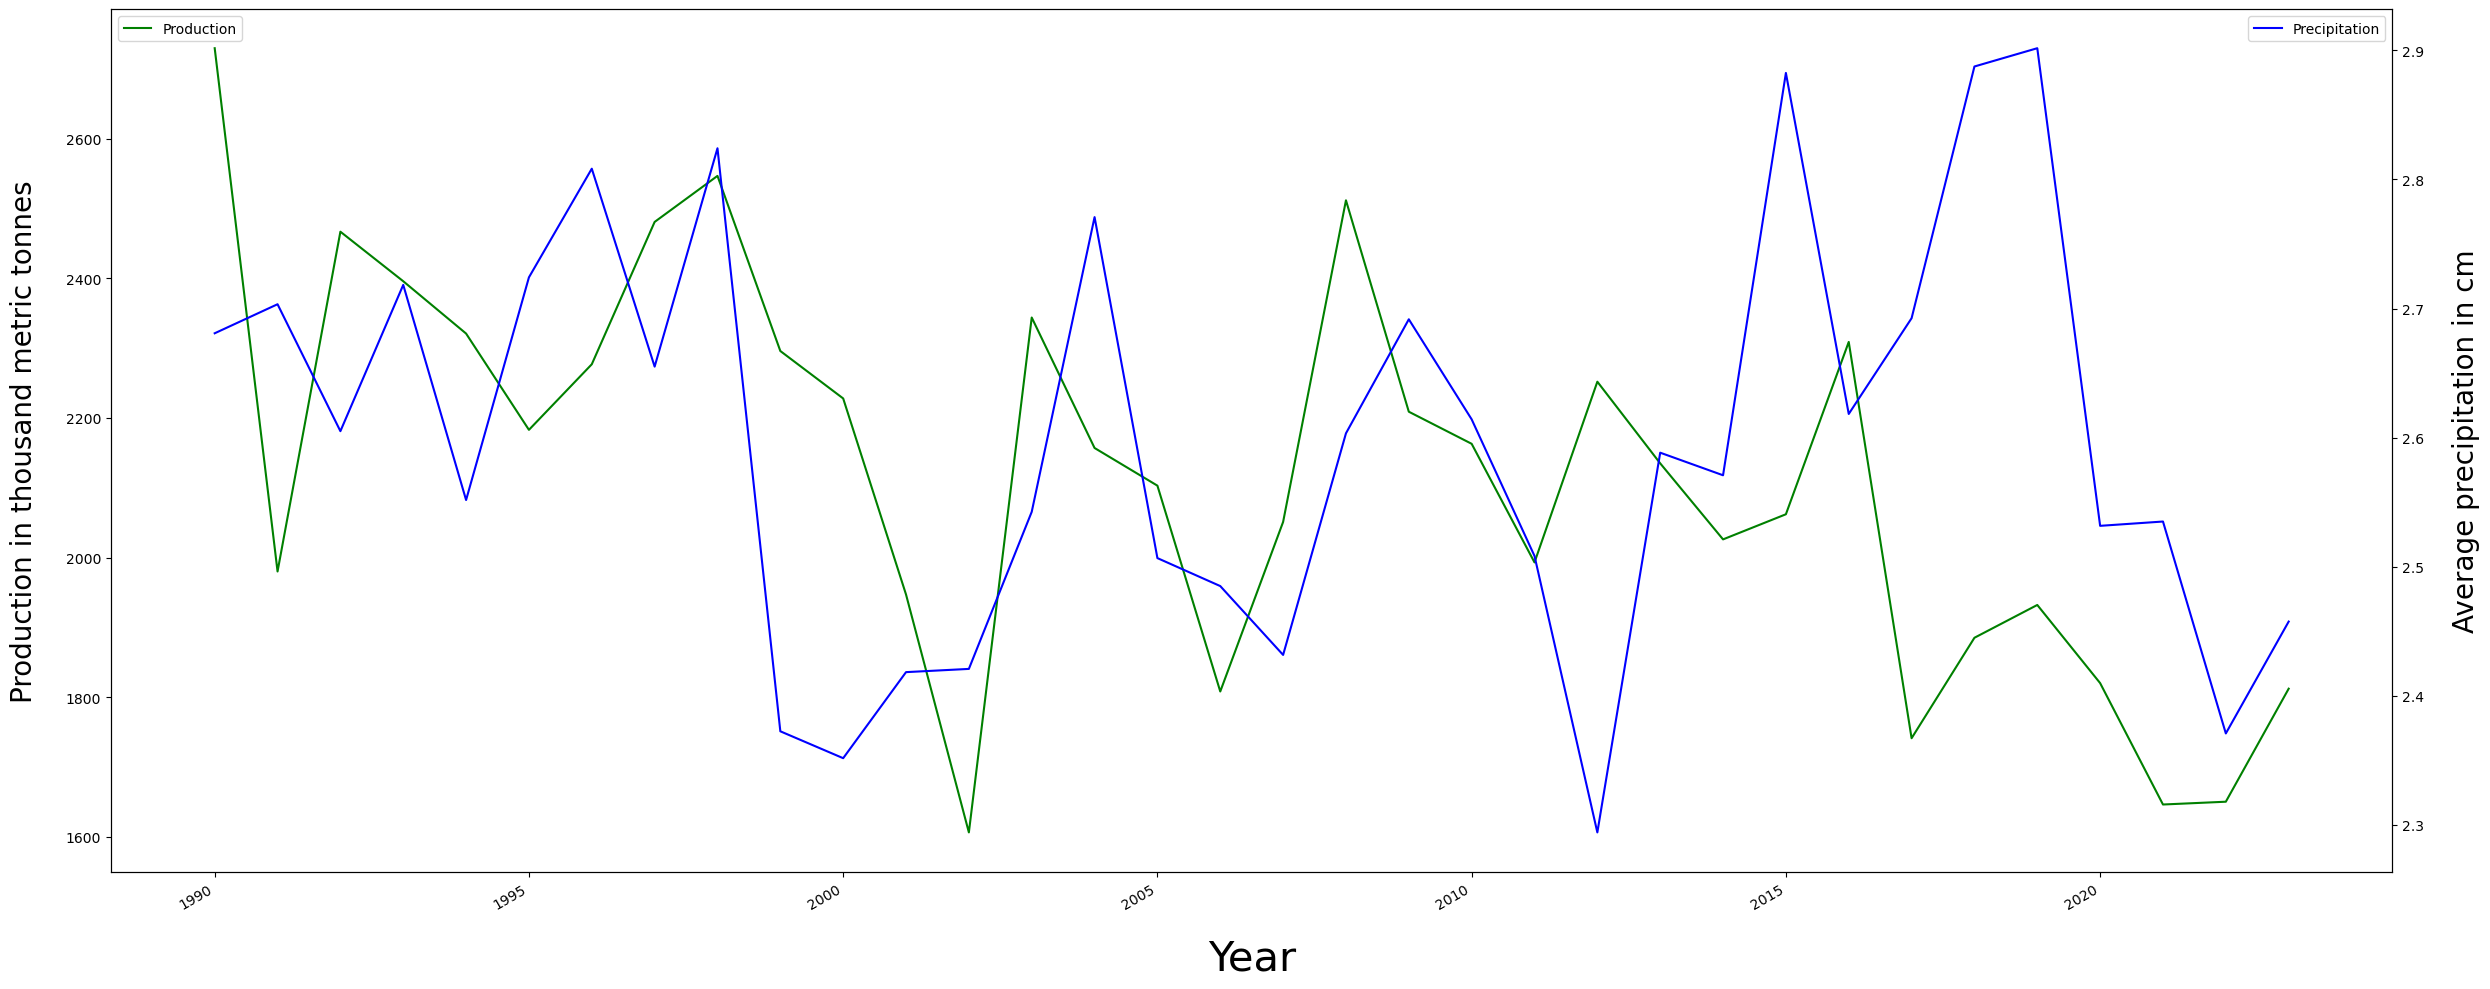

In [70]:
import matplotlib.pyplot as plt

x = pcpt_prod.index
y1 = pcpt_prod['Production']
y2 = pcpt_prod['Precipitation']

fig, ax1 = plt.subplots()

# Duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# Plot data on the first y-axis for production data
ax1.plot(x, y1, color ='green', label='Production')
ax1.set_xlabel("Year", size = 30, labelpad = 20)
ax1.set_ylabel('Production in thousand metric tonnes', size = 20, labelpad = 20)

# Plot data on the second y-axis
ax2.plot(x, y2, color = 'blue', label='Precipitation') 
ax2.set_ylabel('Average precipitation in cm', size = 20, labelpad = 20, color='black')

# Display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.autofmt_xdate()

# future: check if the production changes with price, maybe lower price prompts less production of wheat

In [57]:
pcpt_prod["Production"].corr(pcpt_prod["Precipitation"])

0.2212097443743315

After visualizing all our variables and correlating them with one another, the following bar chart represents which input cost correlates the highest with wheat prices. We found that fertilizer correlates the strongest with wheat prices, and surprisingly precipitation correlates the weakest with wheat prices. Perhaps with the improvements in irrigation system, farmers are less reliant on rainfall in order to secure a good harvest and maintain high production. <br>
The pie chart represents the energy contributions of each input towards wheat production in kilojoules.

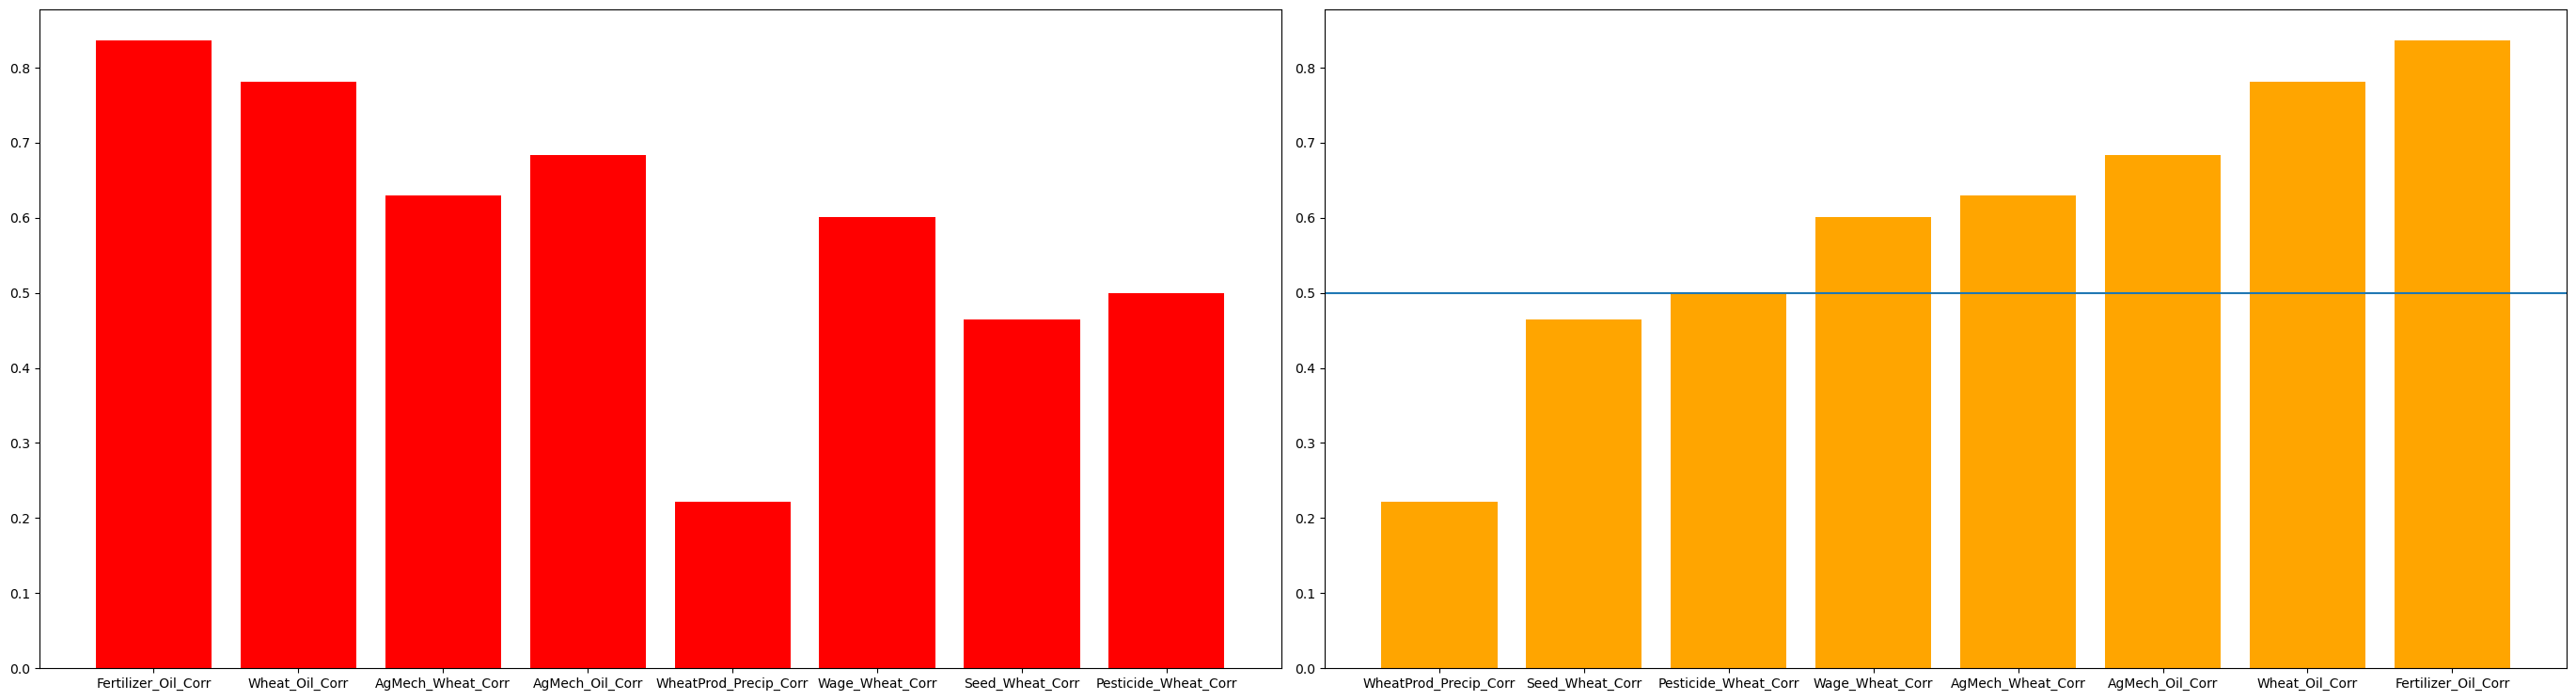

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt



plt.rcParams["figure.figsize"] = [27.50, 7.55]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(
   dict(
      names=['Fertilizer_Oil_Corr', 'Wheat_Oil_Corr', 'AgMech_Wheat_Corr', 'AgMech_Oil_Corr', 'WheatProd_Precip_Corr','Wage_Wheat_Corr','Seed_Wheat_Corr','Pesticide_Wheat_Corr'],
      marks=[0.8359, 0.7817, 0.6294, 0.6841, 0.2212, 0.6014, 0.4643, 0.5 ]
   )
)

plt.subplot(121)
plt.bar('names', 'marks', data=df, color='red')

plt.subplot(122)
df_sorted = df.sort_values('marks')
plt.bar('names', 'marks', data=df_sorted, color='orange')

plt.axhline(y=0.5)

plt.show()

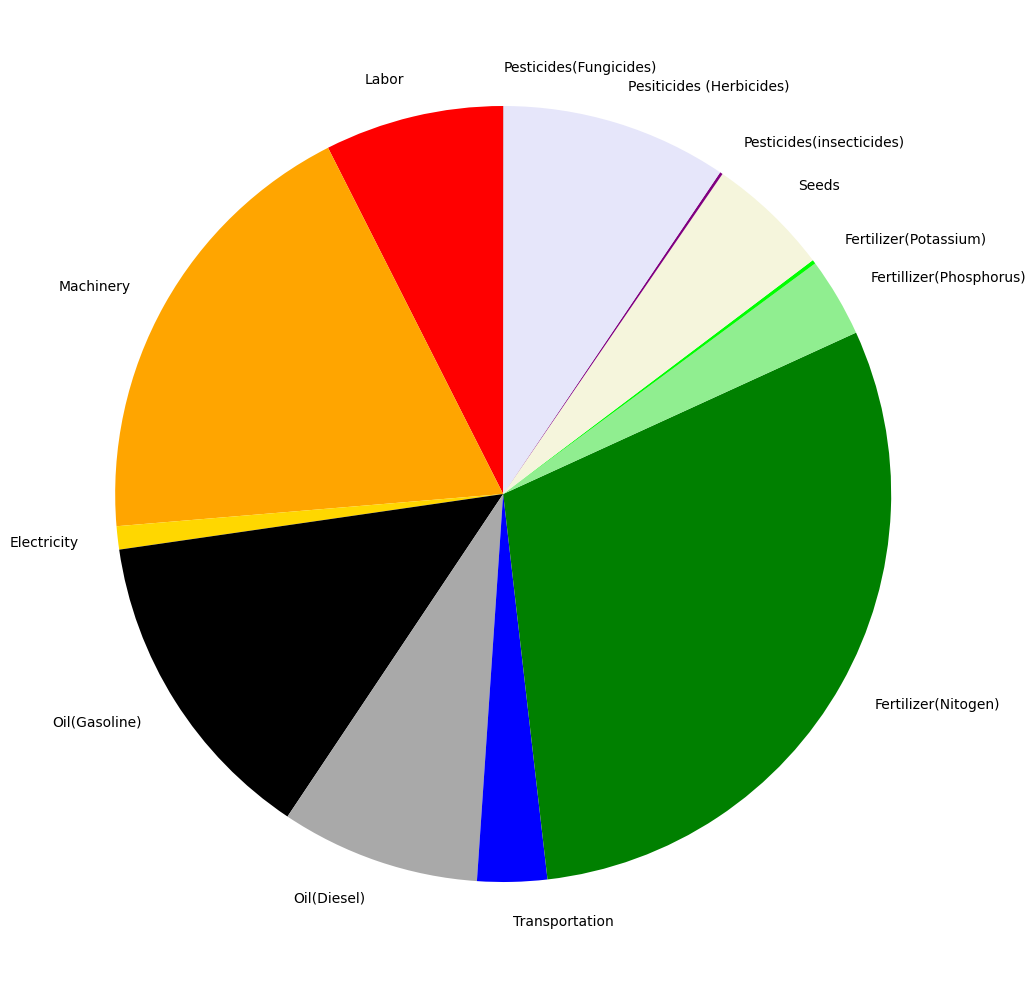

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [25, 10]

y = np.array([316000, 800000, 41000, 565000, 352000, 123000, 1272000, 140000, 7000, 218000, 5000, 400000, 400, ])
mylabels = ['Labor', 'Machinery', 'Electricity','Oil(Gasoline)', 'Oil(Diesel)','Transportation', 'Fertilizer(Nitogen)', 'Fertillizer(Phosphorus)','Fertilizer(Potassium)','Seeds','Pesticides(insecticides)', 'Pesiticides (Herbicides)','Pesticides(Fungicides)']
mycolors = ["red", "orange", 'gold', 'black','darkgrey','blue','green','lightgreen','lime','beige','purple','lavender', 'brown' ]

plt.pie(y, labels = mylabels, startangle = 90, colors=mycolors)
plt.show() 